<a href="https://colab.research.google.com/github/Ayaaasalah/fraud_detection_project/blob/main/Data_exploration_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# === ENHANCED DATA EXPLORATION & FEATURE ENGINEERING ===
# Enhanced to meet project requirements with comprehensive feature engineering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")
# Justification: Load essential packages for data analysis and visualization

# Load datasets
beneficiary_df = pd.read_csv("/content/Train_Beneficiarydata-1542865627584.csv", on_bad_lines='skip', engine='python')
inpatient_df   = pd.read_csv("/content/Train_Inpatientdata-1542865627584.csv")
outpatient_df  = pd.read_csv("/content/Train_Outpatientdata-1542865627584.csv")
labels_df      = pd.read_csv("/content/Train-1542865627584.csv")

print("📊 Dataset shapes:")
print(f"Beneficiary: {beneficiary_df.shape}, Inpatient: {inpatient_df.shape}, Outpatient: {outpatient_df.shape}, Labels: {labels_df.shape}")
# Justification: Load all datasets and verify successful loading

✅ Libraries imported successfully
📊 Dataset shapes:
Beneficiary: (138556, 25), Inpatient: (40474, 30), Outpatient: (517737, 27), Labels: (5410, 2)


In [26]:
# Show first few rows of each as a check
print("\n🔍 First rows of each dataset:")
print("Beneficiary data:")
display(beneficiary_df.head(2))
print("Inpatient data:")
display(inpatient_df.head(2))
print("Outpatient data:")
display(outpatient_df.head(2))
print("Labels data:")
display(labels_df.head(2))
# Justification: Initial data inspection to understand structure


🔍 First rows of each dataset:
Beneficiary data:


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50


Inpatient data:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


Outpatient data:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


Labels data:


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


In [28]:
print("\n" + "="*50)
print("🔍 COMPREHENSIVE DATA QUALITY ASSESSMENT")
print("="*50)

# Check missing values in percentage
print("\n📉 MISSING VALUES ANALYSIS (%):")

def print_missing_percentage(df, dataset_name):
    total_rows = len(df)
    missing_data = df.isna().sum()
    missing_percentage = (missing_data / total_rows) * 100
    missing_df = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percentage': missing_percentage
    })
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

    print(f"\n{dataset_name} - Missing Values:")
    if len(missing_df) > 0:
        for col in missing_df.index:
            print(f"  {col}: {missing_df.loc[col, 'Missing_Count']} ({missing_df.loc[col, 'Missing_Percentage']:.2f}%)")
    else:
        print("  No missing values")

print_missing_percentage(beneficiary_df, "Beneficiary data")
print_missing_percentage(inpatient_df, "Inpatient data")
print_missing_percentage(outpatient_df, "Outpatient data")
print_missing_percentage(labels_df, "Labels data")

# Data types and basic info
print("\n📋 DATA TYPES SUMMARY:")
print("Beneficiary data types:")
print(beneficiary_df.dtypes.value_counts())
print("\nInpatient data types:")
print(inpatient_df.dtypes.value_counts())
print("\nOutpatient data types:")
print(outpatient_df.dtypes.value_counts())
# Justification: Identify data quality issues across all datasets with percentage analysis


🔍 COMPREHENSIVE DATA QUALITY ASSESSMENT

📉 MISSING VALUES ANALYSIS (%):

Beneficiary data - Missing Values:
  DOD: 137135 (98.97%)

Inpatient data - Missing Values:
  ClmProcedureCode_6: 40474 (100.00%)
  ClmProcedureCode_5: 40465 (99.98%)
  ClmProcedureCode_4: 40358 (99.71%)
  ClmProcedureCode_3: 39509 (97.62%)
  ClmDiagnosisCode_10: 36547 (90.30%)
  OtherPhysician: 35784 (88.41%)
  ClmProcedureCode_2: 35020 (86.52%)
  ClmProcedureCode_1: 17326 (42.81%)
  OperatingPhysician: 16644 (41.12%)
  ClmDiagnosisCode_9: 13497 (33.35%)
  ClmDiagnosisCode_8: 9942 (24.56%)
  ClmDiagnosisCode_7: 7258 (17.93%)
  ClmDiagnosisCode_6: 4838 (11.95%)
  ClmDiagnosisCode_5: 2894 (7.15%)
  ClmDiagnosisCode_4: 1534 (3.79%)
  DeductibleAmtPaid: 899 (2.22%)
  ClmDiagnosisCode_3: 676 (1.67%)
  ClmDiagnosisCode_2: 226 (0.56%)
  AttendingPhysician: 112 (0.28%)

Outpatient data - Missing Values:
  ClmProcedureCode_6: 517737 (100.00%)
  ClmProcedureCode_5: 517737 (100.00%)
  ClmProcedureCode_4: 517735 (100.00%)
 

In [29]:
print("\n" + "="*50)
print("🧹 DATA CLEANING & PREPROCESSING")
print("="*50)

# Clean labels data
labels_df = labels_df.dropna(subset=["Provider"])
print("✅ Labels data cleaned - Removed rows with missing Provider")

# Handle chronic conditions in beneficiary data
chronic_cols = [col for col in beneficiary_df.columns if 'ChronicCond' in col]
if chronic_cols:
    beneficiary_df[chronic_cols] = beneficiary_df[chronic_cols].fillna(0)
    print(f"✅ Filled missing values in {len(chronic_cols)} chronic condition columns with 0")

# Remove duplicates
inpatient_df = inpatient_df.drop_duplicates()
outpatient_df = outpatient_df.drop_duplicates()
print(f"✅ Duplicates removed - Inpatient: {inpatient_df.shape}, Outpatient: {outpatient_df.shape}")

# Convert date columns
date_columns_processed = 0
for df, name in [(inpatient_df, "Inpatient"), (outpatient_df, "Outpatient")]:
    for col in df.columns:
        if any(keyword in col.lower() for keyword in ['date', 'dt']):
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                date_columns_processed += 1
            except:
                continue
print(f"✅ Converted {date_columns_processed} date columns to datetime format")
# Justification: Standardize date formats for temporal analysis


🧹 DATA CLEANING & PREPROCESSING
✅ Labels data cleaned - Removed rows with missing Provider
✅ Filled missing values in 11 chronic condition columns with 0
✅ Duplicates removed - Inpatient: (40474, 30), Outpatient: (517737, 27)
✅ Converted 6 date columns to datetime format


In [30]:
print("\n" + "="*50)
print("🔗 COMPREHENSIVE DATA RELATIONSHIPS ANALYSIS")
print("="*50)

# Key relationship analysis
print("🔑 KEY RELATIONSHIPS:")
print(f"Unique Providers in labels: {labels_df['Provider'].nunique()}")
print(f"Unique Providers in inpatient: {inpatient_df['Provider'].nunique()}")
print(f"Unique Providers in outpatient: {outpatient_df['Provider'].nunique()}")
print(f"Unique Beneficiaries: {beneficiary_df['BeneID'].nunique()}")

# Provider coverage analysis
providers_in_both = set(inpatient_df['Provider']).intersection(set(outpatient_df['Provider']))
print(f"📊 Providers with both inpatient & outpatient claims: {len(providers_in_both)}")

# Beneficiary claim patterns
claims_per_bene_in = inpatient_df.groupby("BeneID").size()
claims_per_bene_out = outpatient_df.groupby("BeneID").size()

print(f"\n📈 Claim frequency analysis:")
print(f"Max claims per beneficiary - Inpatient: {claims_per_bene_in.max()}, Outpatient: {claims_per_bene_out.max()}")
print(f"Avg claims per beneficiary - Inpatient: {claims_per_bene_in.mean():.2f}, Outpatient: {claims_per_bene_out.mean():.2f}")
# Justification: Understand data relationships and claim patterns


🔗 COMPREHENSIVE DATA RELATIONSHIPS ANALYSIS
🔑 KEY RELATIONSHIPS:
Unique Providers in labels: 5410
Unique Providers in inpatient: 2092
Unique Providers in outpatient: 5012
Unique Beneficiaries: 138556
📊 Providers with both inpatient & outpatient claims: 1694

📈 Claim frequency analysis:
Max claims per beneficiary - Inpatient: 8, Outpatient: 29
Avg claims per beneficiary - Inpatient: 1.29, Outpatient: 3.86



🎯 TARGET VARIABLE ANALYSIS
📊 Fraud Distribution:
PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64
⚠️  Fraud rate: 9.35% (Severe class imbalance)


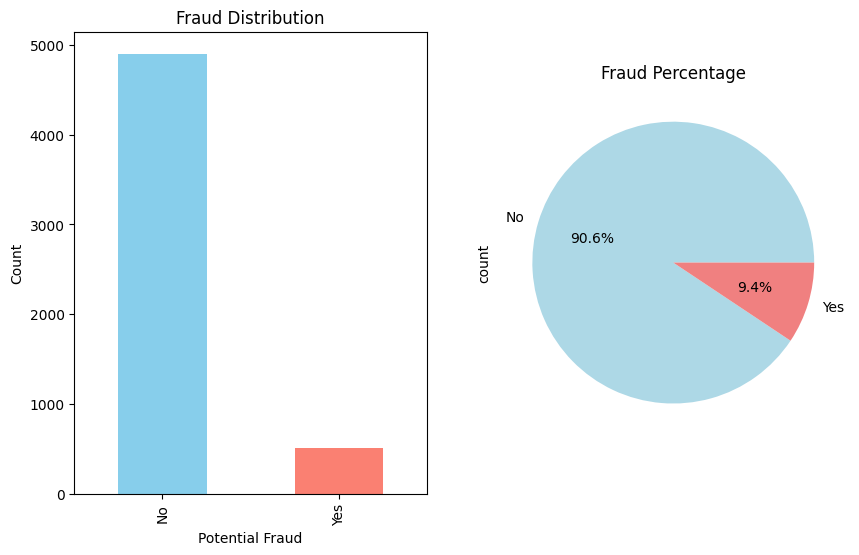

In [31]:
print("\n" + "="*50)
print("🎯 TARGET VARIABLE ANALYSIS")
print("="*50)

# Fraud distribution
fraud_distribution = labels_df['PotentialFraud'].value_counts()
fraud_percentage = (fraud_distribution['Yes'] / len(labels_df)) * 100

print("📊 Fraud Distribution:")
print(fraud_distribution)
print(f"⚠️  Fraud rate: {fraud_percentage:.2f}% (Severe class imbalance)")

# Visualization
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
labels_df['PotentialFraud'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Fraud Distribution')
plt.xlabel('Potential Fraud')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
labels_df['PotentialFraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Fraud Percentage')
plt.show()
# Justification: Analyze class imbalance and target distribution

In [32]:
print("\n" + "="*50)
print("⚙️ COMPREHENSIVE FEATURE ENGINEERING")
print("="*50)

print("🔄 Merging datasets for feature engineering...")

# Merge beneficiary data with claims
inpatient_merged = inpatient_df.merge(beneficiary_df, on="BeneID", how="left")
outpatient_merged = outpatient_df.merge(beneficiary_df, on="BeneID", how="left")

# Add claim type identifiers
inpatient_merged['ClaimType'] = 'Inpatient'
outpatient_merged['ClaimType'] = 'Outpatient'

# Combine all claims
all_claims = pd.concat([inpatient_merged, outpatient_merged], ignore_index=True)
print(f"✅ Combined claims data: {all_claims.shape}")

# Calculate claim duration
all_claims['ClaimDuration'] = (all_claims['ClaimEndDt'] - all_claims['ClaimStartDt']).dt.days
all_claims['ClaimDuration'] = all_claims['ClaimDuration'].fillna(0)
# Justification: Prepare unified dataset for feature engineering


⚙️ COMPREHENSIVE FEATURE ENGINEERING
🔄 Merging datasets for feature engineering...
✅ Combined claims data: (558211, 55)


In [33]:
print("💰 Creating financial features...")
financial_features = all_claims.groupby('Provider').agg({
    'InscClaimAmtReimbursed': ['sum', 'mean', 'std', 'median', 'min', 'max'],
    'DeductibleAmtPaid': ['sum', 'mean'] if 'DeductibleAmtPaid' in all_claims.columns else 'count'
}).round(2)
financial_features.columns = ['Total_Reimbursed', 'Avg_Reimbursement', 'Std_Reimbursement',
                             'Median_Reimbursement', 'Min_Reimbursement', 'Max_Reimbursement',
                             'Total_Deductible', 'Avg_Deductible']

print(f"✅ Financial features created: {financial_features.shape}")
display(financial_features.head(2))
# Justification: Create financial behavior patterns for fraud detection

💰 Creating financial features...
✅ Financial features created: (5410, 8)


,Total_Reimbursed,Avg_Reimbursement,Std_Reimbursement,Median_Reimbursement,Min_Reimbursement,Max_Reimbursement,Total_Deductible,Avg_Deductible
Provider,,,,,,,,
PRV51001,104640,4185.60,10796.09,400.0,10,42000,5340.0,213.60
PRV51003,605670,4588.41,7309.79,1750.0,0,57000,66286.0,502.17


In [34]:
print("📈 Creating claim volume features...")
claim_volume_features = all_claims.groupby('Provider').agg({
    'ClaimID': 'count',
    'BeneID': ['nunique', lambda x: x.value_counts().max()],
    'ClaimType': [lambda x: (x == 'Inpatient').sum(),
                  lambda x: (x == 'Outpatient').sum()],
    'ClaimDuration': ['mean', 'max', 'std']
}).round(2)
claim_volume_features.columns = ['Total_Claims', 'Unique_Beneficiaries', 'Max_Claims_Per_Beneficiary',
                                'Inpatient_Claims', 'Outpatient_Claims', 'Avg_Claim_Duration',
                                'Max_Claim_Duration', 'Std_Claim_Duration']

print(f"✅ Claim volume features created: {claim_volume_features.shape}")
display(claim_volume_features.head(2))
# Justification: Engineer features that capture claim volume and frequency patterns

📈 Creating claim volume features...
✅ Claim volume features created: (5410, 8)


,Total_Claims,Unique_Beneficiaries,Max_Claims_Per_Beneficiary,Inpatient_Claims,Outpatient_Claims,Avg_Claim_Duration,Max_Claim_Duration,Std_Claim_Duration
Provider,,,,,,,,
PRV51001,25,24,2,5,20,1.44,14,3.37
PRV51003,132,117,3,62,70,3.67,27,5.52


In [35]:
print("⏰ Creating temporal features...")
temporal_features = all_claims.groupby('Provider').agg({
    'ClaimStartDt': ['min', 'max', 'nunique']
}).round(2)
temporal_features.columns = ['First_Claim_Date', 'Last_Claim_Date', 'Unique_Claim_Dates']
temporal_features['Activity_Period_Days'] = (temporal_features['Last_Claim_Date'] - temporal_features['First_Claim_Date']).dt.days

print("👥 Creating demographic features...")
demographic_features = all_claims.groupby('Provider').agg({
    'Gender': lambda x: (x == '1').mean(),
    'Race': 'nunique',
    'NoOfMonths_PartACov': 'mean',
    'NoOfMonths_PartBCov': 'mean'
}).round(3)
demographic_features.columns = ['Male_Ratio', 'Race_Diversity', 'Avg_PartA_Coverage', 'Avg_PartB_Coverage']

print(f"✅ Temporal features: {temporal_features[['Activity_Period_Days']].shape}")
print(f"✅ Demographic features: {demographic_features.shape}")
# Justification: Create features that capture timing patterns and beneficiary demographics

⏰ Creating temporal features...
👥 Creating demographic features...
✅ Temporal features: (5410, 1)
✅ Demographic features: (5410, 4)


In [36]:
print("🏥 Creating chronic condition features...")
chronic_features = all_claims.groupby('Provider')[chronic_cols].sum().round(2)
chronic_features.columns = [f'Total_{col}' for col in chronic_cols]

print(f"✅ Chronic condition features created: {chronic_features.shape}")
display(chronic_features.head(2))
# Justification: Engineer features from medical conditions that might indicate targeting patterns

🏥 Creating chronic condition features...
✅ Chronic condition features created: (5410, 11)


,Total_ChronicCond_Alzheimer,Total_ChronicCond_Heartfailure,Total_ChronicCond_KidneyDisease,Total_ChronicCond_Cancer,Total_ChronicCond_ObstrPulmonary,Total_ChronicCond_Depression,Total_ChronicCond_Diabetes,Total_ChronicCond_IschemicHeart,Total_ChronicCond_Osteoporasis,Total_ChronicCond_rheumatoidarthritis,Total_ChronicCond_stroke
Provider,,,,,,,,,,,
PRV51001,35,31,33,45,40,41,29,27,44,42,44
PRV51003,208,184,200,254,223,210,164,152,231,226,252


In [37]:
print("\n🔗 Combining all features...")
provider_features_list = [financial_features, claim_volume_features,
                         temporal_features[['Activity_Period_Days']],
                         demographic_features, chronic_features]

provider_stats = pd.concat(provider_features_list, axis=1)

print("🎯 Creating derived risk indicators...")

# Derived features
provider_stats['Claims_per_Beneficiary'] = provider_stats['Total_Claims'] / provider_stats['Unique_Beneficiaries']
provider_stats['Inpatient_Ratio'] = provider_stats['Inpatient_Claims'] / provider_stats['Total_Claims']
provider_stats['Amount_per_Beneficiary'] = provider_stats['Total_Reimbursed'] / provider_stats['Unique_Beneficiaries']
provider_stats['Claims_per_Day'] = provider_stats['Total_Claims'] / provider_stats['Activity_Period_Days']

# Risk indicators
provider_stats['Amount_Variation_Risk'] = provider_stats['Std_Reimbursement'] / provider_stats['Avg_Reimbursement']
provider_stats['Beneficiary_Concentration_Risk'] = provider_stats['Max_Claims_Per_Beneficiary'] / provider_stats['Total_Claims']

# Handle infinite values
provider_stats = provider_stats.replace([np.inf, -np.inf], np.nan).fillna(0)

# Add target variable
provider_stats = provider_stats.merge(labels_df, on='Provider', how='left')

print(f"✅ Feature engineering completed! Final dataset: {provider_stats.shape}")
display(provider_stats.head(2))
# Justification: Combine all engineered features and create domain-specific risk indicators


🔗 Combining all features...
🎯 Creating derived risk indicators...
✅ Feature engineering completed! Final dataset: (5410, 40)


,Provider,Total_Reimbursed,Avg_Reimbursement,Std_Reimbursement,Median_Reimbursement,Min_Reimbursement,Max_Reimbursement,Total_Deductible,Avg_Deductible,Total_Claims,...,Total_ChronicCond_Osteoporasis,Total_ChronicCond_rheumatoidarthritis,Total_ChronicCond_stroke,Claims_per_Beneficiary,Inpatient_Ratio,Amount_per_Beneficiary,Claims_per_Day,Amount_Variation_Risk,Beneficiary_Concentration_Risk,PotentialFraud
0,PRV51001,104640,4185.60,10796.09,400.0,10,42000,5340.0,213.60,25,...,44,42,44,1.041667,0.200000,4360.000000,0.069832,2.579341,0.080000,No
1,PRV51003,605670,4588.41,7309.79,1750.0,0,57000,66286.0,502.17,132,...,231,226,252,1.128205,0.469697,5176.666667,0.370787,1.593099,0.022727,Yes


In [38]:
print("\n" + "="*50)
print("📊 EXPLORATORY DATA ANALYSIS & VISUALIZATION")
print("="*50)

print("📈 COMPARISON: FRAUDULENT vs NON-FRAUDULENT PROVIDERS")

fraud_stats = provider_stats[provider_stats['PotentialFraud'] == 'Yes']
non_fraud_stats = provider_stats[provider_stats['PotentialFraud'] == 'No']

print(f"Fraudulent providers: {len(fraud_stats)}, Non-fraudulent: {len(non_fraud_stats)}")

# Key metric comparisons
key_metrics = ['Total_Reimbursed', 'Total_Claims', 'Unique_Beneficiaries', 'Claims_per_Beneficiary', 'Amount_Variation_Risk']
comparison_data = []

for metric in key_metrics:
    fraud_mean = fraud_stats[metric].mean()
    non_fraud_mean = non_fraud_stats[metric].mean()
    ratio = fraud_mean / non_fraud_mean if non_fraud_mean > 0 else 0
    comparison_data.append([metric, fraud_mean, non_fraud_mean, ratio])

comparison_df = pd.DataFrame(comparison_data, columns=['Metric', 'Fraud_Mean', 'NonFraud_Mean', 'Ratio'])
print("\nKey metric comparison:")
display(comparison_df)
# Justification: Compare fraudulent vs non-fraudulent providers to identify patterns


📊 EXPLORATORY DATA ANALYSIS & VISUALIZATION
📈 COMPARISON: FRAUDULENT vs NON-FRAUDULENT PROVIDERS
Fraudulent providers: 506, Non-fraudulent: 4904

Key metric comparison:


,Metric,Fraud_Mean,NonFraud_Mean,Ratio
0,Total_Reimbursed,584350.039526,53193.723491,10.985319
1,Total_Claims,420.545455,70.435359,5.970658
2,Unique_Beneficiaries,242.021739,49.110318,4.928124
3,Claims_per_Beneficiary,1.482765,1.310802,1.131189
4,Amount_Variation_Risk,2.310836,1.784322,1.295078



📊 GENERATING DISTRIBUTION VISUALIZATIONS...


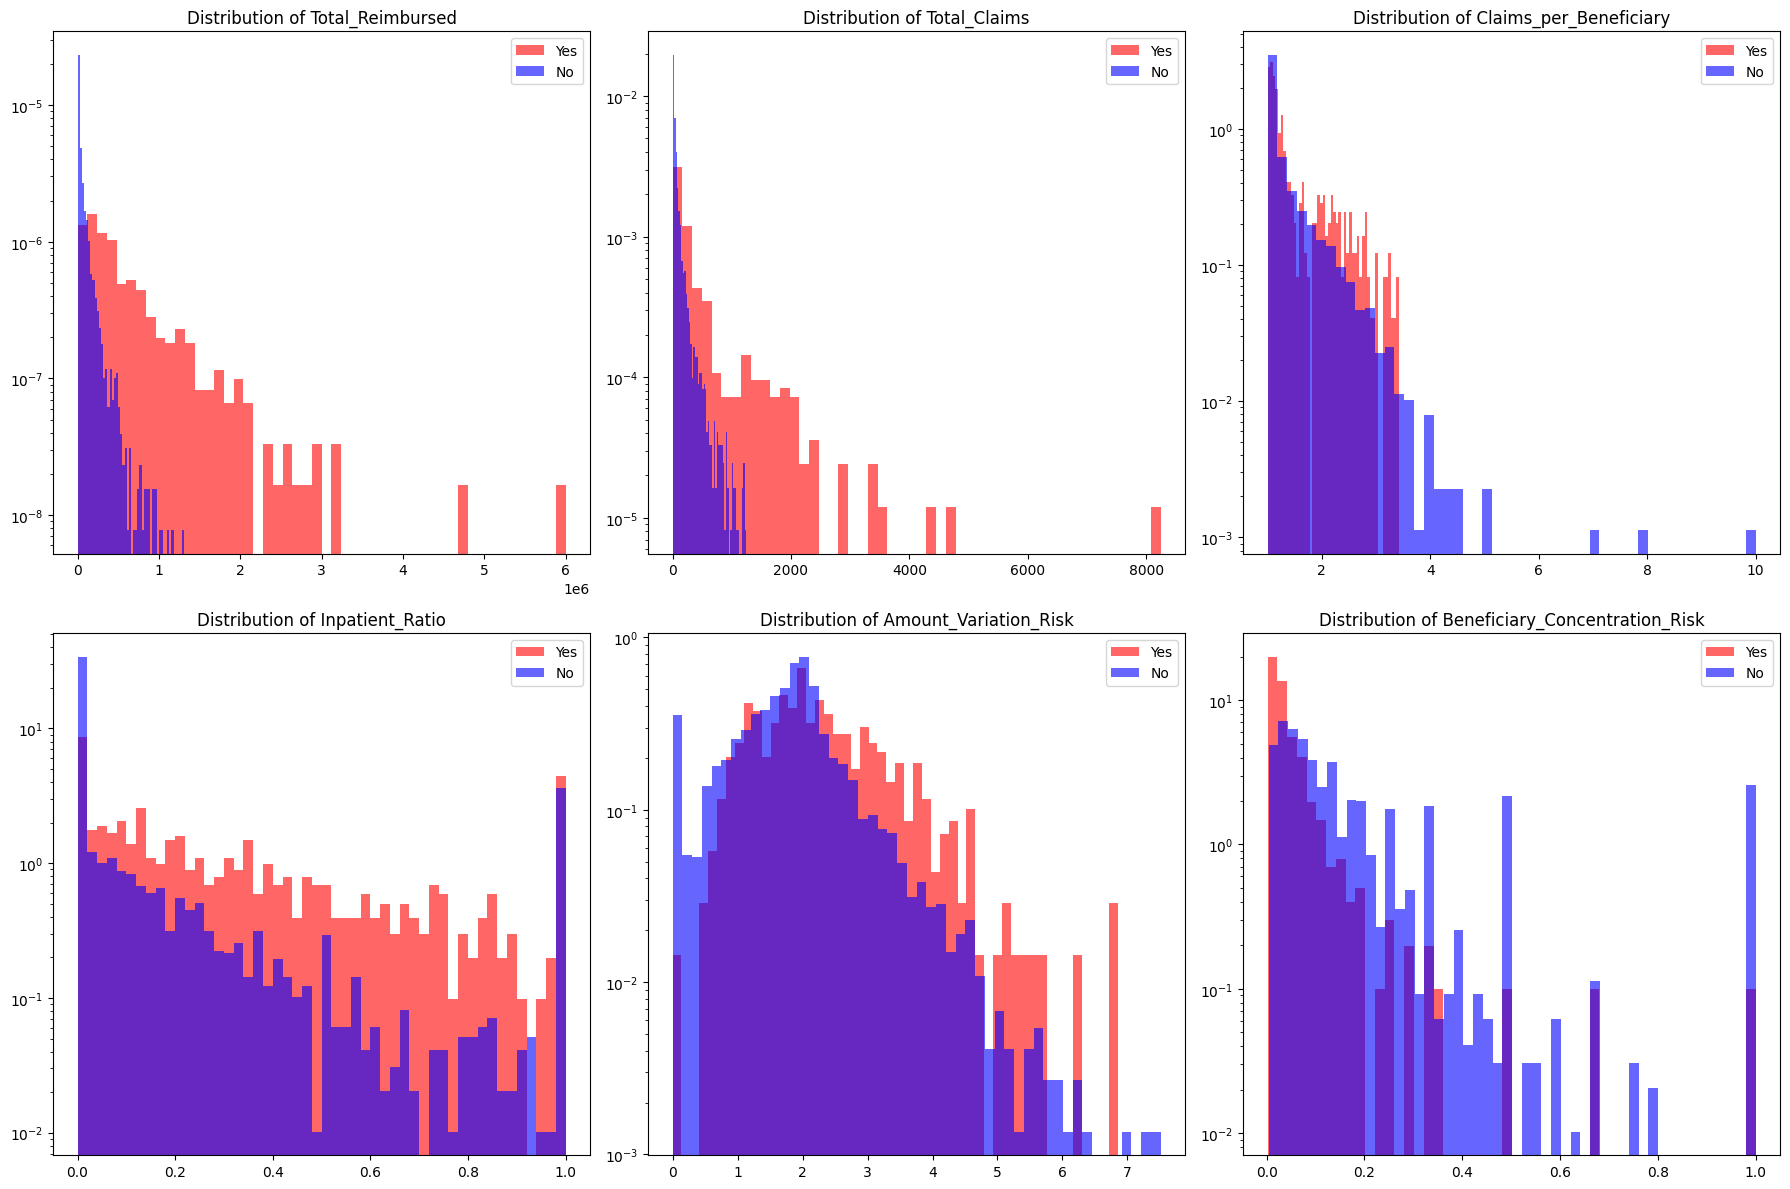

In [39]:
print("\n📊 GENERATING DISTRIBUTION VISUALIZATIONS...")

# Distribution of key features by fraud status
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
features_to_plot = ['Total_Reimbursed', 'Total_Claims', 'Claims_per_Beneficiary',
                   'Inpatient_Ratio', 'Amount_Variation_Risk', 'Beneficiary_Concentration_Risk']

for i, feature in enumerate(features_to_plot):
    row, col = i // 3, i % 3
    for fraud_status, color in [('Yes', 'red'), ('No', 'blue')]:
        data = provider_stats[provider_stats['PotentialFraud'] == fraud_status][feature]
        axes[row, col].hist(data, bins=50, alpha=0.6, label=fraud_status, color=color, density=True)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].legend()
    axes[row, col].set_yscale('log')

plt.tight_layout()
plt.show()
# Justification: Visualize feature distributions to understand differences between fraud classes

🔗 Correlation Heatmap:


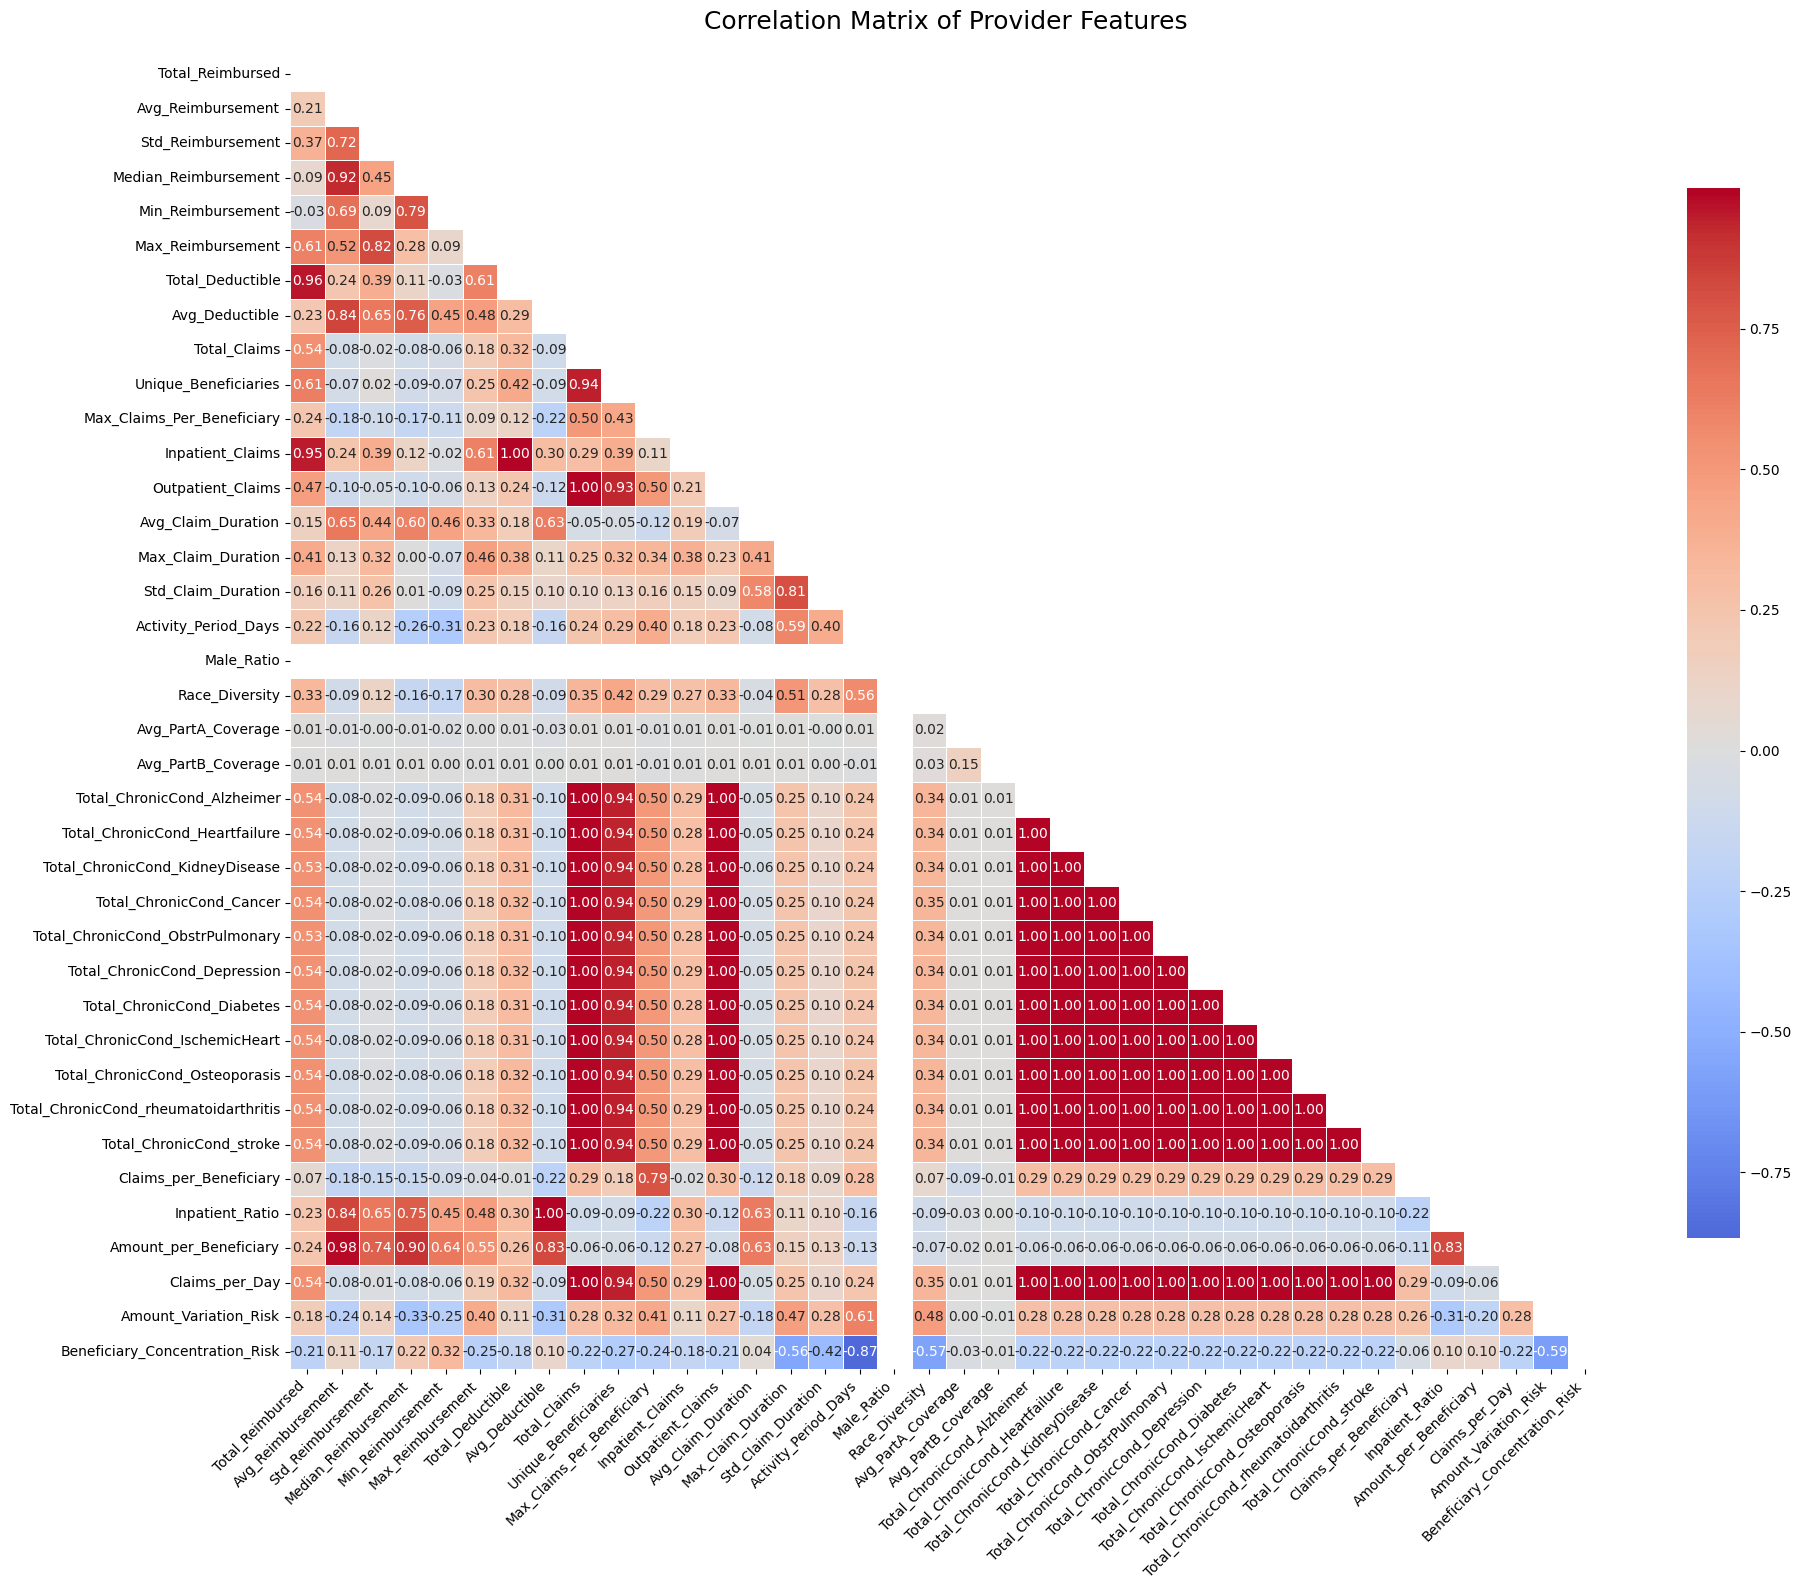


🎯 Top features correlated with fraud:


,PotentialFraud
PotentialFraud,1.000000
Total_Reimbursed,0.575558
Total_Deductible,0.532070
Inpatient_Claims,0.525393
Max_Reimbursement,0.514671
Unique_Beneficiaries,0.393531
Max_Claim_Duration,0.375310
Claims_per_Day,0.374523
Total_Claims,0.374197
Total_ChronicCond_Cancer,0.373615


In [42]:
print("🔗 Correlation Heatmap:")
plt.figure(figsize=(20, 16))
numeric_cols = provider_stats.select_dtypes(include=[np.number]).columns
correlation_matrix = provider_stats[numeric_cols].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Improve heatmap readability
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm",
            center=0, square=True, linewidths=0.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Provider Features", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature importance preview (correlation with target)
provider_stats_numeric = provider_stats.copy()
provider_stats_numeric['PotentialFraud'] = provider_stats_numeric['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Exclude 'Provider' column before calculating correlation
target_correlations = provider_stats_numeric.drop('Provider', axis=1).corr()['PotentialFraud'].sort_values(ascending=False)
print("\n🎯 Top features correlated with fraud:")
display(target_correlations.head(10))
# Justification: Analyze feature relationships and identify most discriminative features with improved readability


🗺️ GEOGRAPHIC PATTERNS ANALYSIS
State-level Fraud Rates (%):


,PotentialFraud
State,
49,43.080357
53,37.606838
30,36.704120
41,33.587786
31,32.859400
9,31.460674
44,31.401869
27,30.792683
24,29.880044


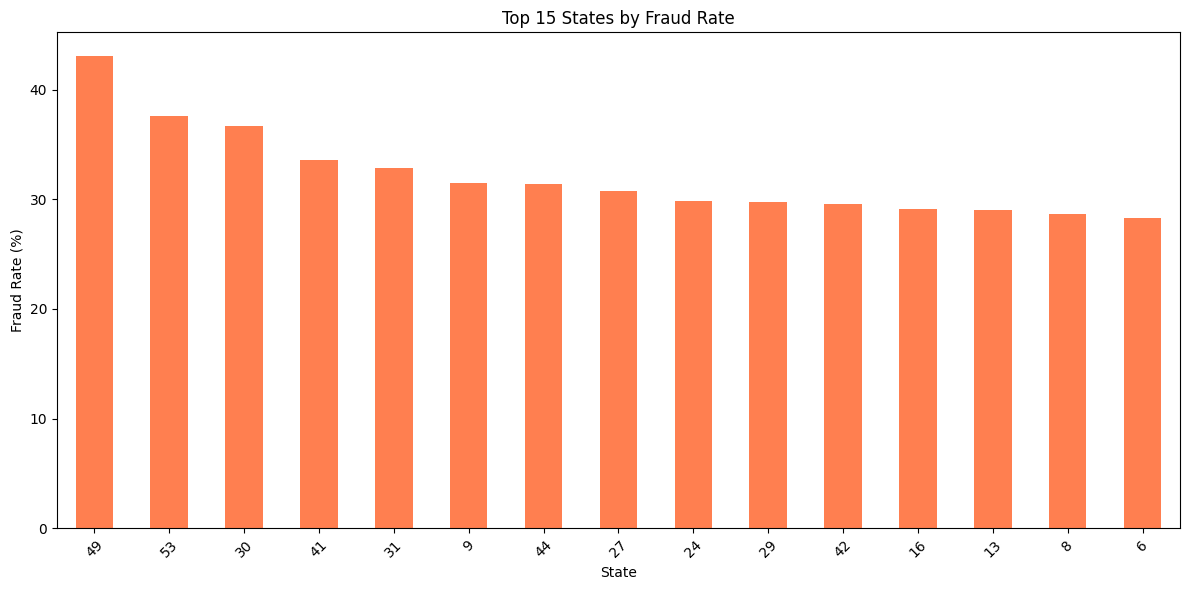

In [43]:
# === ADDITIONAL: GEOGRAPHIC PATTERNS ===
print("\n" + "="*50)
print("🗺️ GEOGRAPHIC PATTERNS ANALYSIS")
print("="*50)

if 'State' in beneficiary_df.columns and 'County' in beneficiary_df.columns:
    # Merge geographic data with fraud labels
    provider_geo = all_claims[['Provider', 'State', 'County']].drop_duplicates()
    provider_geo = provider_geo.merge(labels_df, on='Provider', how='left')

    # State-level fraud analysis
    state_fraud_rates = provider_geo.groupby('State')['PotentialFraud'].apply(
        lambda x: (x == 'Yes').mean() * 100
    ).sort_values(ascending=False)

    print("State-level Fraud Rates (%):")
    display(state_fraud_rates.head(10))

    # Visualization
    plt.figure(figsize=(12, 6))
    state_fraud_rates.head(15).plot(kind='bar', color='coral')
    plt.title('Top 15 States by Fraud Rate')
    plt.ylabel('Fraud Rate (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Geographic data (State/County) not available in the dataset")
# Justification: Analyze geographic patterns of fraud as required


📅 TEMPORAL PATTERNS ANALYSIS


<Figure size 1400x800 with 0 Axes>

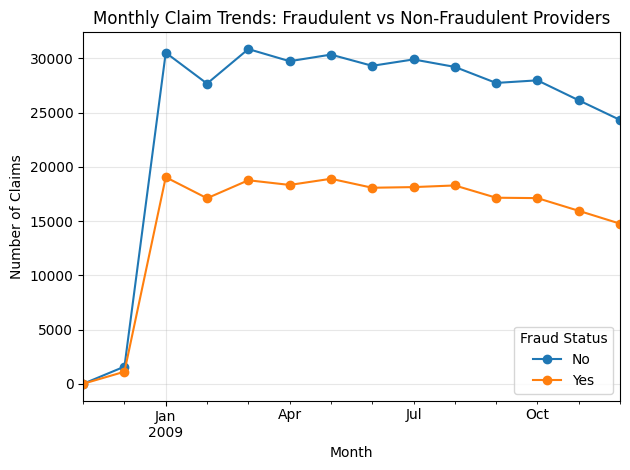

Monthly claim trends visualized


In [44]:
# === ADDITIONAL: TEMPORAL PATTERNS ===
print("\n" + "="*50)
print("📅 TEMPORAL PATTERNS ANALYSIS")
print("="*50)

# Monthly claim trends by fraud status
all_claims_with_fraud = all_claims.merge(labels_df, on='Provider', how='left')
all_claims_with_fraud['ClaimMonth'] = all_claims_with_fraud['ClaimStartDt'].dt.to_period('M')

monthly_trends = all_claims_with_fraud.groupby(['ClaimMonth', 'PotentialFraud']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
monthly_trends.plot(kind='line', marker='o')
plt.title('Monthly Claim Trends: Fraudulent vs Non-Fraudulent Providers')
plt.xlabel('Month')
plt.ylabel('Number of Claims')
plt.legend(title='Fraud Status')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Monthly claim trends visualized")
# Justification: Analyze temporal patterns and seasonal trends in fraud


📊 OUTLIER DETECTION ANALYSIS
Outlier Analysis (IQR method):


,Feature,Outlier_Count,Outlier_Percentage,Lower_Bound,Upper_Bound
0,Total_Reimbursed,633,11.700555,-117197.500,207222.500
1,Total_Claims,622,11.497227,-105.500,202.500
2,Claims_per_Beneficiary,616,11.386322,0.400,2.000
3,Avg_Reimbursement,810,14.972274,-1654.235,3376.785


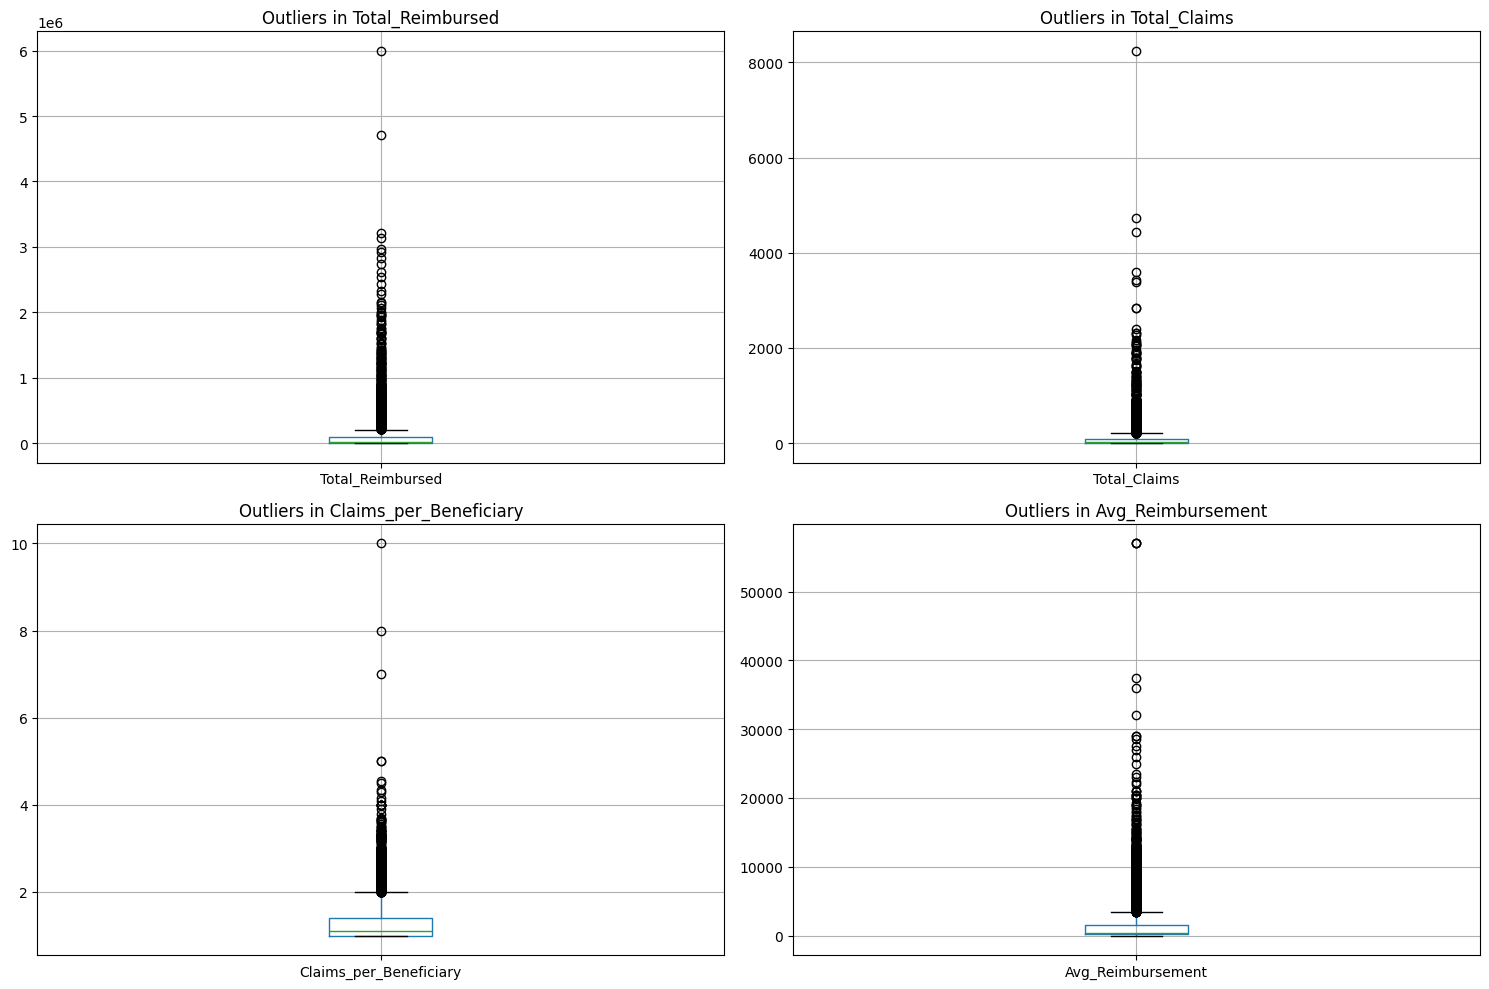

In [45]:
# === ADDITIONAL: OUTLIER DETECTION ===
print("\n" + "="*50)
print("📊 OUTLIER DETECTION ANALYSIS")
print("="*50)

# Identify outliers using IQR method for key features
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers), lower_bound, upper_bound

outlier_features = ['Total_Reimbursed', 'Total_Claims', 'Claims_per_Beneficiary', 'Avg_Reimbursement']

print("Outlier Analysis (IQR method):")
outlier_summary = []
for feature in outlier_features:
    if feature in provider_stats.columns:
        outlier_count, lower, upper = detect_outliers(provider_stats[feature])
        total_count = len(provider_stats[feature])
        outlier_pct = (outlier_count / total_count) * 100
        outlier_summary.append([feature, outlier_count, outlier_pct, lower, upper])

outlier_df = pd.DataFrame(outlier_summary,
                         columns=['Feature', 'Outlier_Count', 'Outlier_Percentage', 'Lower_Bound', 'Upper_Bound'])
display(outlier_df)

# Visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, feature in enumerate(outlier_features[:4]):
    row, col = i // 2, i % 2
    if feature in provider_stats.columns:
        provider_stats.boxplot(column=feature, ax=axes[row, col])
        axes[row, col].set_title(f'Outliers in {feature}')
plt.tight_layout()
plt.show()
# Justification: Identify and visualize outliers in key features as required

In [47]:
import os

# === CREATE FINAL INTEGRATED CSV FOR MODELING ===
print("="*60)
print("CREATING FINAL INTEGRATED CSV FOR MODELING")
print("="*60)

# Select the most important features for modeling (excluding highly correlated and less important ones)
print("🔧 Selecting optimal features for modeling...")

# Define final feature set based on correlation analysis and domain relevance
final_features = [
    # Financial Features (most important)
    'Total_Reimbursed', 'Avg_Reimbursement', 'Std_Reimbursement', 'Median_Reimbursement',

    # Claim Pattern Features
    'Total_Claims', 'Unique_Beneficiaries', 'Claims_per_Beneficiary',
    'Inpatient_Ratio', 'Max_Claims_Per_Beneficiary',

    # Temporal Features
    'Avg_Claim_Duration', 'Activity_Period_Days', 'Claims_per_Day',

    # Demographic Features
    'Male_Ratio', 'Race_Diversity', 'Avg_PartA_Coverage', 'Avg_PartB_Coverage',

    # Risk Indicators (domain-specific fraud signals)
    'Amount_Variation_Risk', 'Beneficiary_Concentration_Risk',

    # Chronic Condition Features (select most relevant)
    'Total_ChronicCond_Heartfailure', 'Total_ChronicCond_Diabetes', 'Total_ChronicCond_IschemicHeart',

    # Target Variable
    'PotentialFraud'
]

# Filter only features that exist in our dataset
available_features = [f for f in final_features if f in provider_stats.columns]
print(f"✅ Selected {len(available_features)} features for final modeling dataset")

# Create the final modeling dataset
modeling_dataset = provider_stats[available_features].copy()

# Data quality final check
print("\n🔍 Final Data Quality Check:")
print(f"Dataset shape: {modeling_dataset.shape}")
print(f"Missing values: {modeling_dataset.isnull().sum().sum()}")
print(f"Fraud distribution: {modeling_dataset['PotentialFraud'].value_counts().to_dict()}")

# Display feature summary
print(f"\n📊 FINAL MODELING FEATURES ({len(available_features)-1} features + target):")
for i, feature in enumerate(available_features):
    if feature != 'PotentialFraud':
        feature_type = 'Numerical' if modeling_dataset[feature].dtype in ['int64', 'float64'] else 'Categorical'
        print(f"  {i+1:2d}. {feature:30} ({feature_type})")

# Save the final integrated CSV
output_filename = 'integrated_provider_data_modeling.csv'
modeling_dataset.to_csv(output_filename, index=True)

print(f"\n💾 FINAL INTEGRATED CSV SAVED: '{output_filename}'")
print("="*60)
print("📁 FILE DETAILS:")
print(f"   • Rows: {modeling_dataset.shape[0]} providers")
print(f"   • Columns: {modeling_dataset.shape[1]} ({(modeling_dataset.shape[1]-1)} features + target)")
print(f"   • Fraud rate: {(modeling_dataset['PotentialFraud'] == 'Yes').sum() / len(modeling_dataset) * 100:.1f}%")
print(f"   • File size: {os.path.getsize(output_filename) / 1024 / 1024:.2f} MB")
print("\n🎯 READY FOR MODELING PHASE!")
print("   This file contains all integrated data needed for model training")
print("   Next: Use this CSV in 02_modeling.ipynb")
print("="*60)

# Display first few rows of the final dataset
print("\n📋 FIRST 3 ROWS OF FINAL DATASET:")
display(modeling_dataset.head(3))

CREATING FINAL INTEGRATED CSV FOR MODELING
🔧 Selecting optimal features for modeling...
✅ Selected 22 features for final modeling dataset

🔍 Final Data Quality Check:
Dataset shape: (5410, 22)
Missing values: 0
Fraud distribution: {'No': 4904, 'Yes': 506}

📊 FINAL MODELING FEATURES (21 features + target):
   1. Total_Reimbursed               (Numerical)
   2. Avg_Reimbursement              (Numerical)
   3. Std_Reimbursement              (Numerical)
   4. Median_Reimbursement           (Numerical)
   5. Total_Claims                   (Numerical)
   6. Unique_Beneficiaries           (Numerical)
   7. Claims_per_Beneficiary         (Numerical)
   8. Inpatient_Ratio                (Numerical)
   9. Max_Claims_Per_Beneficiary     (Numerical)
  10. Avg_Claim_Duration             (Numerical)
  11. Activity_Period_Days           (Numerical)
  12. Claims_per_Day                 (Numerical)
  13. Male_Ratio                     (Numerical)
  14. Race_Diversity                 (Numerical)
  15. A

,Total_Reimbursed,Avg_Reimbursement,Std_Reimbursement,Median_Reimbursement,Total_Claims,Unique_Beneficiaries,Claims_per_Beneficiary,Inpatient_Ratio,Max_Claims_Per_Beneficiary,Avg_Claim_Duration,...,Male_Ratio,Race_Diversity,Avg_PartA_Coverage,Avg_PartB_Coverage,Amount_Variation_Risk,Beneficiary_Concentration_Risk,Total_ChronicCond_Heartfailure,Total_ChronicCond_Diabetes,Total_ChronicCond_IschemicHeart,PotentialFraud
0,104640,4185.60,10796.09,400.0,25,24,1.041667,0.200000,2,1.44,...,0.0,2,12.000,12.000,2.579341,0.080000,31,29,27,No
1,605670,4588.41,7309.79,1750.0,132,117,1.128205,0.469697,3,3.67,...,0.0,3,11.818,11.871,1.593099,0.022727,184,164,152,Yes
2,52170,350.13,689.96,70.0,149,138,1.079710,0.000000,4,1.43,...,0.0,3,11.866,11.960,1.970582,0.026846,210,193,190,No
